<center>
<h1 id="setting_up_K_means">PERSONAL LOAN CLASSIFICATION PROBLEM</h1>
<center>

### Problem Statement:
This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns to better target marketing to increase the success ratio with a minimal budget.

The department wants to build a model that will help them identify the potential customers who have a higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

##### Datasource : https://www.kaggle.com/itsmesunil/bank-loan-modelling

#### Data Description:

ID: Customer ID <br>
Age: Customer's age in completed years <br>
Experience : #years of professional experience <br>
Income: Annual income of the customer (KUSD) <br>
ZIPCode: Home Address ZIP code.<br>
Family:Family size of the customer <br>
CCAvg: Avg. spending on credit cards per month <br>
Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional <br>
Mortgage: Value of house mortgage if any. (KUSD) <br>
Personal Loan: Did this customer accept the personal loan offered in the last campaign? <br>
Securities Account: Does the customer have a securities account with the bank? <br>
CD Account : Does the customer have a certificate of deposit (CD) account with the bank? <br>
Online : Does the customer use internet banking facilities? <br>
CreditCard: Does the customer use a credit card issued by UniversalBank? <br>

<h3>Table of contents</h3>
<div class="alert alert-success" style="margin-top:15px">
    <u
       <li><font color='blue'>Module 1: Import Library and Dataset</li><br>
    <u
       <li>Module 2: Data Cleaning</li><br>
    <u
       <li>Module 3: Feature Engineer</li><br>
    <u
       <li>Module 4: EDA - Exploratory Data Analysis</li>
                <li><a><font color='black'>Finding Correlation between responsed variable</a></li>
                <li><a><font color='black'>Explore each correlation variable, and demographics</a></li>
    <u
       <li>Module 5: Model Development</li>
                <li><a><font color='black'>K-Mean Clustering</a></li>
                <li><a><font color='black'>Classification Model</a></li>
                <li><a><font color='black'>Evaluation</a></li>
                <li><a><font color='black'>Conclusion</a></li>
            </ol>
    </ul>
</div>
<hr>

# Module 1: Import Library and Dataset

Require following library:

In [218]:
#Processing Data
import pandas as pd
import numpy as np
import warnings
import datetime as dt
#Visualization

%matplotlib inline
import matplotlib
matplotlib.matplotlib_fname()
import matplotlib.pyplot as plt
from matplotlib import colors

import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from pandas_profiling import ProfileReport
#Machine Learning:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [219]:
data = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', 'Data')

In [220]:
data.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [4]:
#Rename Columns for easy call later.

In [221]:
data.columns = ["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","PersonalLoan","SecuritiesAccount","CDAccount","Online","CreditCard"]

In [222]:
data.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   PersonalLoan  SecuritiesAccount  CDAccount  Online  CreditCard  
0             0                  1          0       0           0  
1             0                  1          0       0           0  
2             0                  0          0       0           0  
3             0                  0          0       0           0  
4             0                  0          0       0           1

In [223]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5000 non-null   int64  
 1   Age                5000 non-null   int64  
 2   Experience         5000 non-null   int64  
 3   Income             5000 non-null   int64  
 4   ZIPCode            5000 non-null   int64  
 5   Family             5000 non-null   int64  
 6   CCAvg              5000 non-null   float64
 7   Education          5000 non-null   int64  
 8   Mortgage           5000 non-null   int64  
 9   PersonalLoan       5000 non-null   int64  
 10  SecuritiesAccount  5000 non-null   int64  
 11  CDAccount          5000 non-null   int64  
 12  Online             5000 non-null   int64  
 13  CreditCard         5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


(5000, 14)

In [224]:
data.isnull().sum()

ID                   0
Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

In [225]:
data.describe().T.style.bar(subset=['mean'], color='#F0A500')\
                            .background_gradient(subset=['std'], cmap='PuBu')\
                            .background_gradient(subset=['50%'], cmap='PuBu')

# Module 2: Data Cleaning

In [226]:
# calculate duplicates
dups = data.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(data[dups])

False
Empty DataFrame
Columns: [ID, Age, Experience, Income, ZIPCode, Family, CCAvg, Education, Mortgage, PersonalLoan, SecuritiesAccount, CDAccount, Online, CreditCard]
Index: []


<font color='red'>There is no duplicated value</font>

In [227]:
start_time = dt.datetime.now()
print("Started at ", start_time)

Started at  2021-10-29 16:09:46.659737


In [228]:
report = ProfileReport(data)

In [229]:
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Review data information:
1. **ID** does not add any impact to the model. **Therefore, we will delete it later.**
2. Most of the **Age** are around 30, 45, 53, 57 years old=> around middle-age
3. **Experience** is mostly ranging from 7 to 35 years. **The minium value has negative value => we will delete it later.**
4. **Income** of customers are mostly ranging from 38,000 to 83,000 USD
5. Most of **Family** has 1,2 kids.
6. **Average Spending** (CCAvg) is between 0k to 2.5k, CCAve has positive skewed 1.59
7. 69.2% of customers do not join **Mortgage**. 70% of the individuals have a mortgage of less than 40K. However the max value is 635K.
8. **Customer education backgrounds** are 41,9% undergraduation, 28.1% graduation, and 30% master/advanced level.

#### Binary Variable:
9. 90.4% of customers did not accept **the personal loan offered in the last campaign.**
10. 89.6% of customers did not have **security account with bank.**
11. 94% of customers did not have a **certificate of deposit (CD) account with the bank.**
12. 59.7% of customers use internet **banking facilities, others is 40.3%.**
13. 70.6% of customers did not use a **credit card issued by Universal Bank.**

In [230]:
# First, we drop ID columns
data = data.drop(columns=['ID'])

In [231]:
# Then, we find any value that have negative:
data[data['Experience'] < 0]['Experience'].count()

52

In [232]:
# removing negative value
data = data[(data["Experience"]>0)]

In [233]:
negative_removed = [x for x in data['Experience'] if x < 0]
print('Negative observations: %d' % len(negative_removed))

Negative observations: 0


#### Check Outliers:

The most effective way to find all of your outliers is by using the interquartile range (IQR). The IQR contains the middle bulk of your data, so outliers can be easily found once you know the IQR.

In [234]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
detect = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
detect

Age                    0
Experience             0
Income                95
ZIPCode                1
Family                 0
CCAvg                289
Education              0
Mortgage             283
PersonalLoan         473
SecuritiesAccount    508
CDAccount            300
Online                 0
CreditCard             0
dtype: int64

<Figure size 432x288 with 0 Axes>

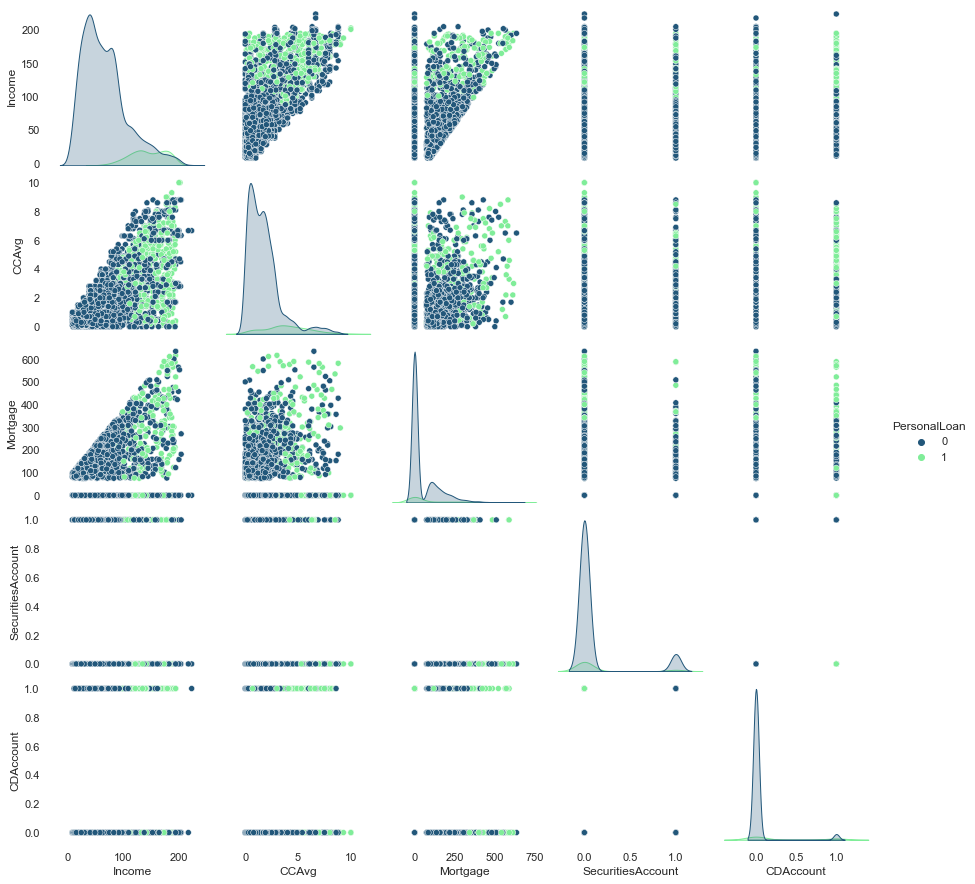

In [235]:
# Visualize Outlier
# Set color for graph
sns.set(rc={"axes.facecolor":"#FFFFFF","figure.facecolor":"#FFFFFF"})
pallet = ["#22577A", "#38A3A5", "#57CC99", "#57CC99", "#055052", "#08FFC8"]
cmap = colors.ListedColormap(["#22577A", "#38A3A5", "#57CC99", "#57CC99", "#055052", "#08FFC8"])

#Plotting following features
To_Plot = [ "Income", "CCAvg", "Mortgage", "PersonalLoan", "SecuritiesAccount", "CDAccount"]
plt.figure()
sns.pairplot(data[To_Plot], hue= "PersonalLoan", palette= (["#22577A","#80ED99"]))
#Taking hue 
plt.show()

Outliers increase the variability in the data, which decreases statistical power. Consequently, excluding outliers can cause the results to become statistically significant.However, In this situation, there is no statiscal error, outlier can capture the valuable information to analyse, so I will keep the outlier.

Next, we will perform the Exploratory Data Analytic (EDA), and see the relationship, correlation between each feature. 

# Module 3: EDA - Exploratory Data Analysis

### 1. Correlation of each feature.

<AxesSubplot:>

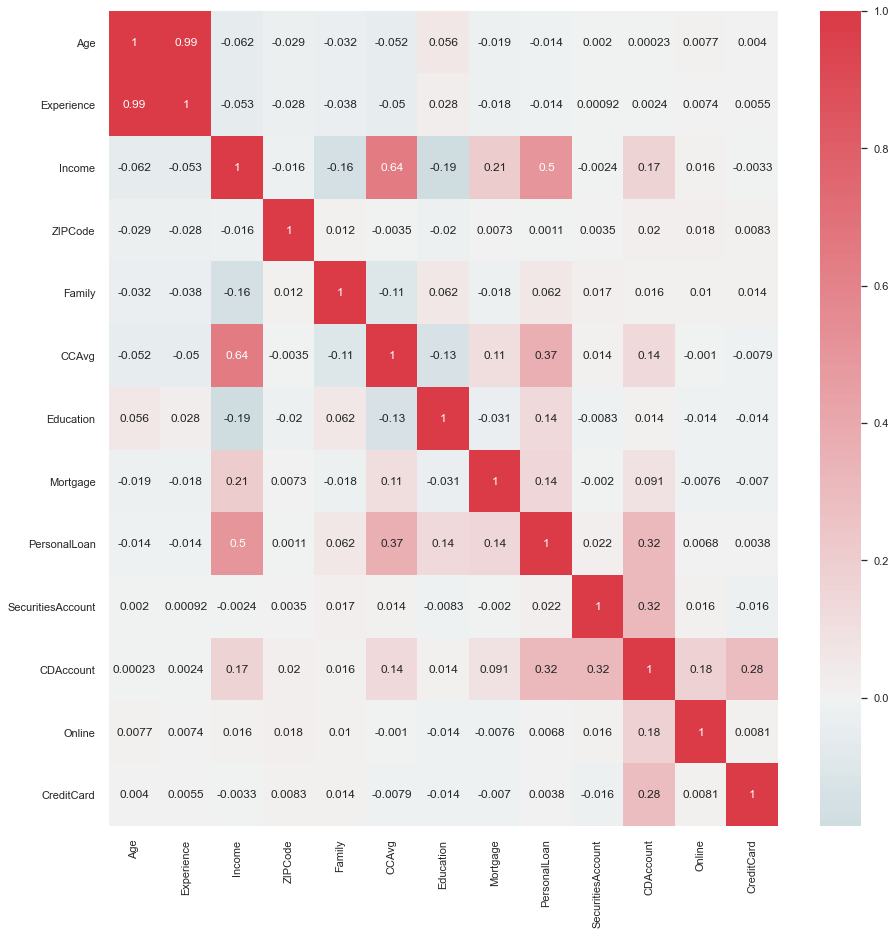

In [46]:
corrmat= data.corr()
cmap2 = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(15,15))  
sns.heatmap(corrmat,annot=True, cmap=cmap2, center=0)

#### Feature have high correlation:
 - Experience and Age have high correlation (99%)
 - Average Spending with Income (64%)
 - Personal Loan with Income (50%)

#### Feature have average correlation:
 - Mortgage with Income (21%)
 - Personal Loan with Average Spending (37%)
 - CD Account with Personal Loans, and Security Account (32%) and Credit Card (28%)

### 2. Explore those high and average correlation feature.

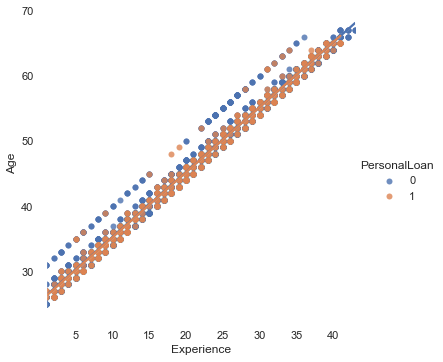

In [236]:
# Visualization Age and Experience
g1 = sns.lmplot(
    data= data,
    x="Experience", y="Age", hue="PersonalLoan",
    height=5)

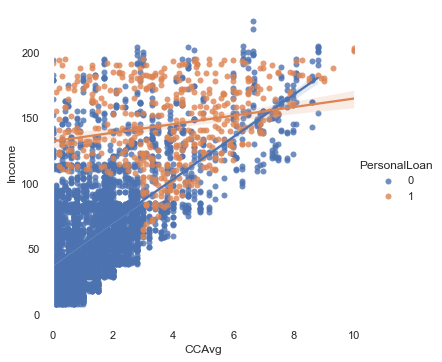

In [237]:
# Visualization CCAvg and Income
g2 = sns.lmplot(
    data= data,
    x="CCAvg", y="Income", hue="PersonalLoan",
    height=5)

<font color='red'>**Observation**:</font><br>
Most of customers who did not accept loan offer have low or average income. In contrast, high income customers have accept loan offer and equivalent to high spending average.

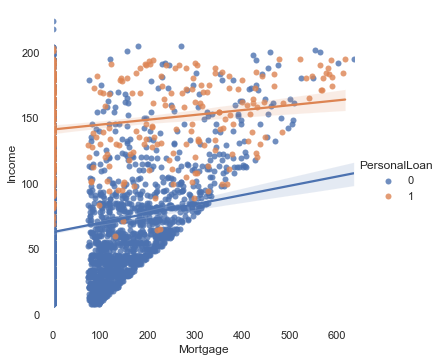

In [238]:
# Visualization Mortgage and Income
g3 = sns.lmplot(
    data= data,
    x="Mortgage", y="Income", hue="PersonalLoan",
    height=5)

<font color='red'>**Observation**:</font><br>
Most customer have accept loan offer also have high mortgage => make sense

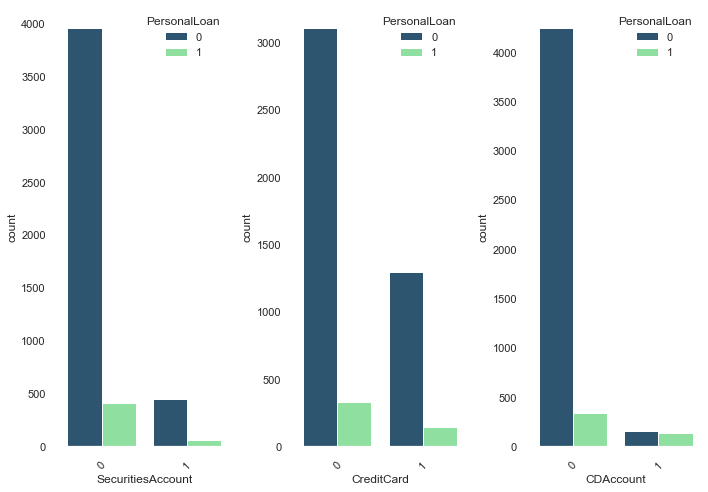

In [244]:
# Visualization Security Account and Credit Card Experience
variable_1 = ["SecuritiesAccount", "CreditCard", "CDAccount"]
plt.figure(figsize = (10, 7))
for i in enumerate(variable_1):  
    plt.subplot(1, 3,i[0]+1)
    ax = sns.countplot(data = data, x=data[i[1]], hue = data["PersonalLoan"], palette=["#22577A","#80ED99"])
    plt.xticks(rotation = 45)
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

<font color='red'>**Observation**:</font><br>
Customers who does not have CD account, Security Account, and Universal Credit Card , does not have loan as well. This seems to be majority.

In [ ]:
# Visualize Personal Loan wih Income, Average Spending, and CDAccount

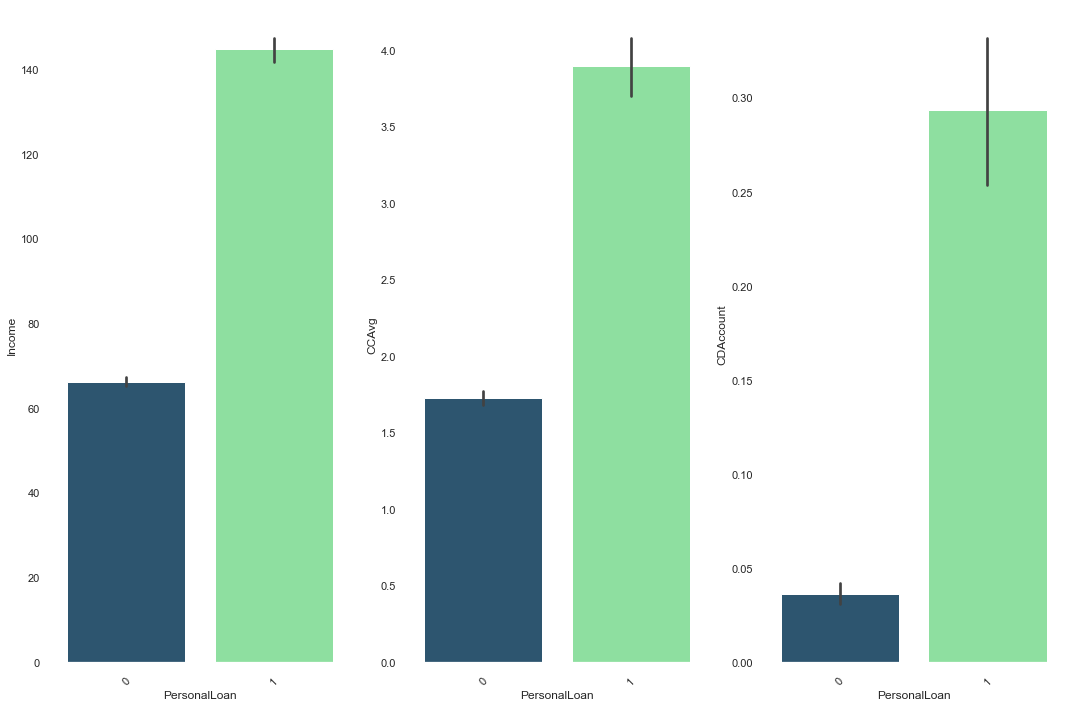

In [245]:
feature_select = ["Income", "CCAvg", "CDAccount"]
plt.figure(figsize = (15, 10))
for i in enumerate(feature_select):  
    plt.subplot(1, 3,i[0]+1)
    ax = sns.barplot(data = data, y=data[i[1]], x = "PersonalLoan", palette=["#22577A","#80ED99"])
    plt.xticks(rotation = 45)
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

<font color='red'>**Observation**:</font><br>
Most of customers have accepted loan offer are high in income, and average spending, and all customers who has CD account has loan as well.

### 3. Explore demographic with loan offer campagin.

For this analysis, we would overview these features: <Br> 
- Customer Age
- Family
- Education
- Experience

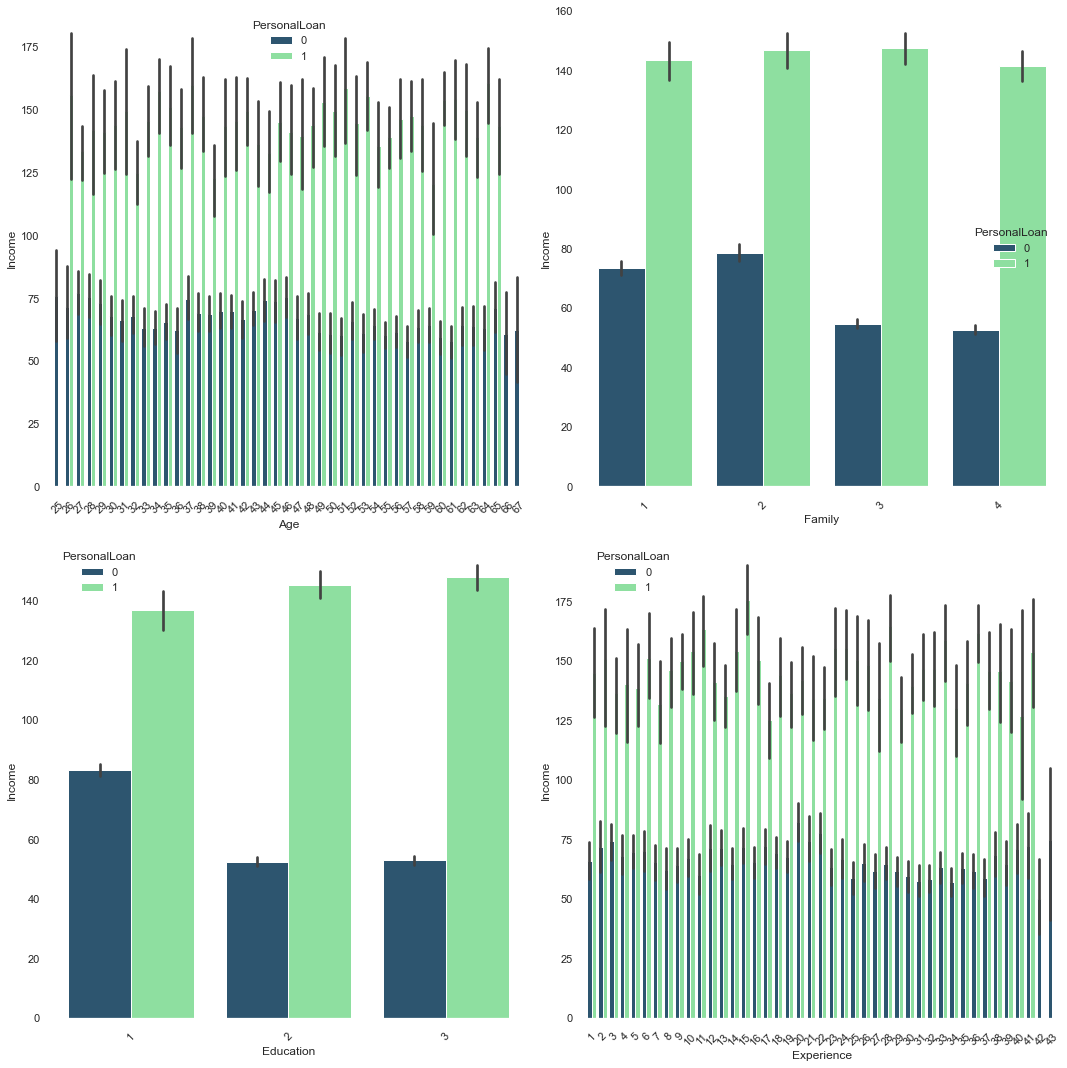

In [293]:
feature_select = ["Age", "Family", "Education", "Experience"]
plt.figure(figsize = (15, 15))
for i in enumerate(feature_select):  
    plt.subplot(2, 2,i[0]+1)
    ax = sns.barplot(data = data, x=data[i[1]], y = data["Income"], hue = 'PersonalLoan', palette=["#22577A","#80ED99"])
    plt.xticks(rotation = 45)
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

<font color='red'>**Observation**:</font><br>
 -  Experience and Age spead equally between accept and non-accept loan offer.
 -  Family size have 2 kids whom has the highest income.
 -  The customers whose education level is 1 is having more income. However customers who has taken the personal loan have the same income levels.

In [247]:
loan_count = data['PersonalLoan'].value_counts()
loan_count = loan_count.to_frame().reset_index()
loan_count.columns = ['PersonalLoan', 'count']   
loan_count = loan_count.sort_values('PersonalLoan', ascending = True)

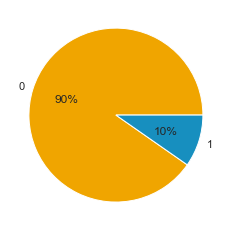

In [249]:
colors = sns.color_palette(["#f0a500", "#178fbf"])
label = loan_count['PersonalLoan']
count_value = loan_count['count']
ax1 = plt.pie(x = count_value, labels = label, colors = colors, autopct='%.0f%%')
plt.show()

Only 10% of population join the loan offer from marketing campaign. This can cost imbalance data for training.

# Module 4: Developing Model

Before applying classification algorithms, I would check see how cluster analyse can perform to recluster the population by using K-mean Cluster. Then, I would use classification algorithms to classify the label.

<h3>Table of contents</h3>
<div class style="margin-top:15px">
    <u
            <ol>
                <li><a href="https://#pre_processing">Pre-processing</a></li>
                <li><a href="https://#modeling">Modeling (Clustering and Supervised Learning)</a></li>
                <li><a href="https://#insights">Evaluation</a></li>
            </ol>
    </ul>
</div>
<hr>


<h2 id="pre_processing">Pre-processing</h2

Before we add data into cluster algorithms, we need to preprocess data by label encoding, normalization through StandardScaling.

In [250]:
data_cluster = data.copy()

In [251]:
col_del = ['ZIPCode', 'Family']

In [252]:
data_cluster = data_cluster.drop(col_del, axis=1)

In [253]:
s = (data_cluster.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: []


There is no categorical variables

### 2. Normalizing over the standard deviation
Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use **StandardScaler()** to normalize our dataset.

In [254]:
# Start Scaling
scaler = StandardScaler()
scaler.fit(data_cluster)
scaled_dataset = pd.DataFrame(scaler.transform(data_cluster),columns= data_cluster.columns)

In [255]:
scaled_dataset.head(3)

Age  Experience    Income     CCAvg  Education  Mortgage  \
0 -1.867187   -1.760656 -0.539402 -0.192210  -1.042424 -0.557304   
1 -0.074100   -0.144214 -0.864725 -0.249520  -1.042424 -0.557304   
2 -0.612026   -0.503423 -1.363553 -0.536071  -1.042424 -0.557304   

   PersonalLoan  SecuritiesAccount  CDAccount   Online  CreditCard  
0     -0.327537           2.934320  -0.255878 -1.22151   -0.646809  
1     -0.327537           2.934320  -0.255878 -1.22151   -0.646809  
2     -0.327537          -0.340794  -0.255878 -1.22151   -0.646809

### 3. Dimensionality Reduction:
Since there are many variable that correlated, but quite redundant. We need a method for which feature keep and which one delete.

Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables. <br>
**Principal component analysis (PCA)** is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.<br>
<font color='red'>This method I learn from Author: Karnika Kapoor</font>

In [256]:
pca = PCA(n_components=3)
pca.fit(scaled_dataset)
PCA_ds = pd.DataFrame(pca.transform(scaled_dataset), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%  \
col1  4882.0  1.166621e-17  1.505827 -2.612888 -1.042144 -0.346454  0.592382   
col2  4882.0  2.910867e-18  1.401559 -2.919644 -1.130276  0.031397  1.092166   
col3  4882.0 -9.278390e-18  1.180657 -3.031307 -0.697863 -0.168834  0.455822   

           max  
col1  6.921267  
col2  4.487943  
col3  5.540544

<h2 id="pre_processing">Modeling</h2

## 1. K-Means Clustering

Despite its simplicity, the **K-means** is vastly used for clustering in many data science applications, it is especially useful if you need to quickly discover insights from unlabeled data.<br>
**Definition:** K-Means is a type of partitioning clustering, that is, it divides the data into K non-overlapping subsets or clusters without any cluster internal structure or labels. 

In [257]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

##### Let find suitable K for K-mean cluster

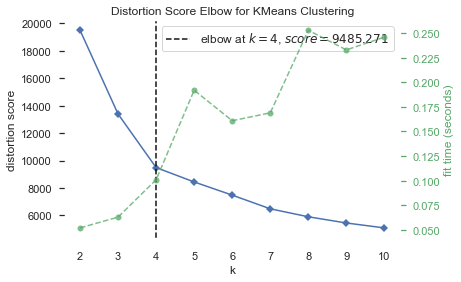

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [258]:
# Looping to find the best K
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

The elbow at k = 4 is the most suitable K

In [259]:
gmm = GaussianMixture(n_components = 4, covariance_type = 'spherical', max_iter = 3000, random_state = 228).fit(PCA_ds)
labels = gmm.predict(PCA_ds)
PCA_ds['Kmean_Cluster'] = labels
data_cluster['KmeanCluster'] = labels

In [260]:
data_cluster.head(3)

Age  Experience  Income  CCAvg  Education  Mortgage  PersonalLoan  \
0   25           1      49    1.6          1         0             0   
1   45          19      34    1.5          1         0             0   
2   39          15      11    1.0          1         0             0   

   SecuritiesAccount  CDAccount  Online  CreditCard  KmeanCluster  
0                  1          0       0           0             3  
1                  1          0       0           0             3  
2                  0          0       0           0             3

In [261]:
clusters_count = data_cluster['KmeanCluster'].value_counts()
clusters_count = clusters_count.to_frame().reset_index()
clusters_count.columns = ['KmeanCluster', 'count']   
clusters_count = clusters_count.sort_values('KmeanCluster', ascending = True)
clusters_count

KmeanCluster  count
0             0   1983
2             1    756
3             2    300
1             3   1843

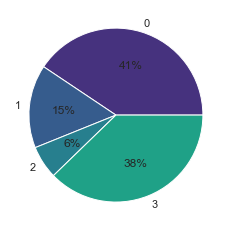

In [262]:
colors = sns.color_palette("viridis")
label = clusters_count['KmeanCluster']
count_value = clusters_count['count']
plt.pie(x = count_value, labels = label, colors = colors, autopct='%.0f%%')
plt.show()

We can easily see the centroid of each cluster with the table below:

In [263]:
data_cluster.groupby('KmeanCluster').mean()

Age  Experience      Income     CCAvg  Education  \
KmeanCluster                                                           
0             55.531518   30.208270   55.971256  1.335014   1.963691   
1             44.359788   19.350529  145.064815  4.468739   1.583333   
2             45.836667   20.710000  104.493333  2.871722   1.920000   
3             35.984265   10.772111   58.941400  1.389763   1.891481   

                Mortgage  PersonalLoan  SecuritiesAccount  CDAccount  \
KmeanCluster                                                           
0              43.633384      0.000000           0.081694        0.0   
1             104.640212      0.441799           0.048942        0.0   
2              92.940000      0.463333           0.483333        1.0   
3              45.577320      0.000000           0.088985        0.0   

                Online  CreditCard  
KmeanCluster                        
0             0.597579    0.279375  
1             0.522487    0.187831  
2             0.936667    0.796667  
3             0.576234    0.274010

### 2. Visualization:

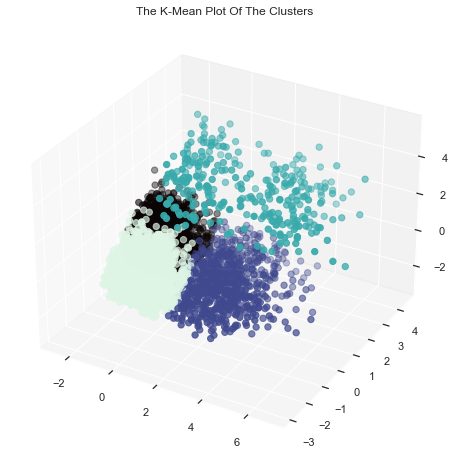

In [264]:
#3D Plot of K-Mean Clustering
fig = plt.figure(figsize=(10,8))
ax1 = plt.subplot(111, projection='3d', label="bla")
ax1.scatter(x, y, z, s=40, c=PCA_ds['Kmean_Cluster'], marker='o', cmap = "mako")
ax1.set_title("The K-Mean Plot Of The Clusters")
plt.show()

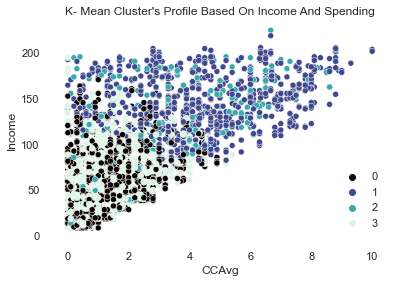

In [265]:
# Cluster Profile based on Income and Total Spending:
plt_income_spend = sns.scatterplot(data = data_cluster, x = data_cluster['CCAvg'], y = data_cluster['Income'], hue = data_cluster['KmeanCluster'], palette = "mako")
plt_income_spend.set_title("K- Mean Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

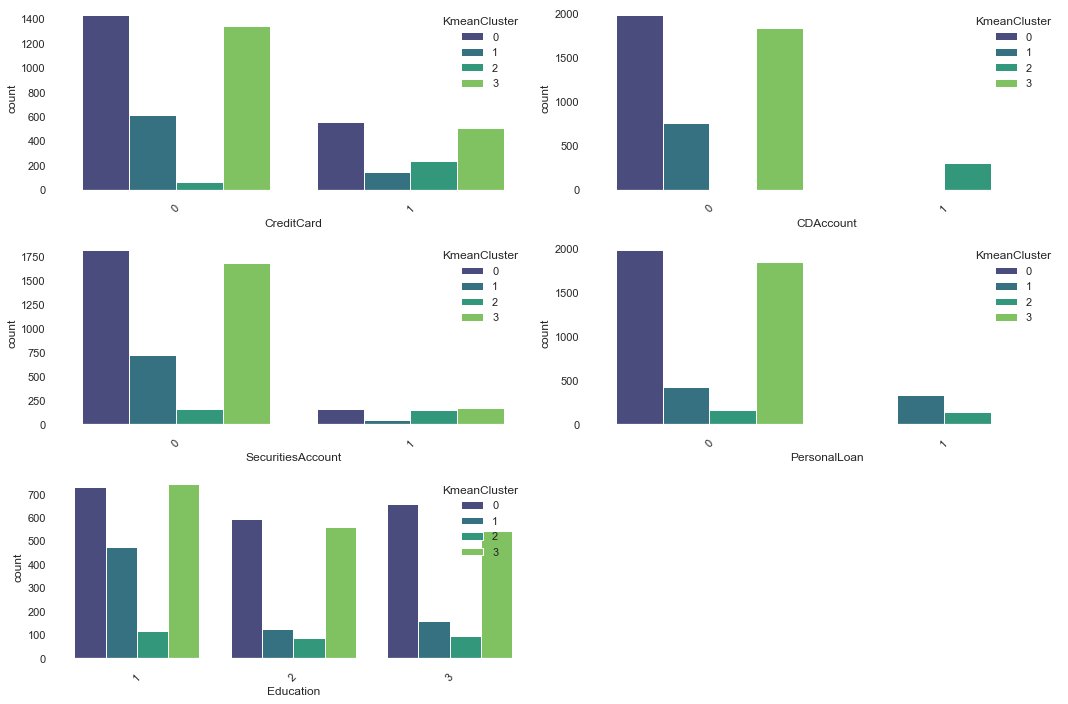

In [266]:
feature_select_2 = ["CreditCard", "CDAccount","SecuritiesAccount","PersonalLoan","Education"]
plt.figure(figsize = (15, 10))
for i in enumerate(feature_select_2):  
    plt.subplot(3, 2, i[0]+1)
    pl = sns.countplot(data = data_cluster, x=data_cluster[i[1]],hue=data_cluster['KmeanCluster'], palette="viridis")
    plt.xticks(rotation = 45)
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

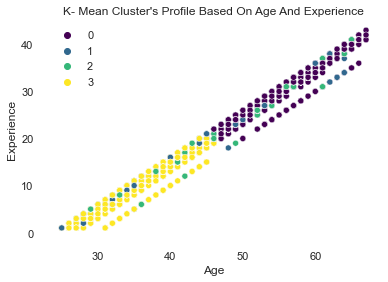

In [268]:
# Cluster Profile based on Age and Experience:
plt_income_spend = sns.scatterplot(data = data_cluster, x = data_cluster['Age'], y = data_cluster['Experience'], hue = data_cluster['KmeanCluster'], palette = "viridis")
plt_income_spend.set_title("K- Mean Cluster's Profile Based On Age And Experience")
plt.legend()
plt.show()

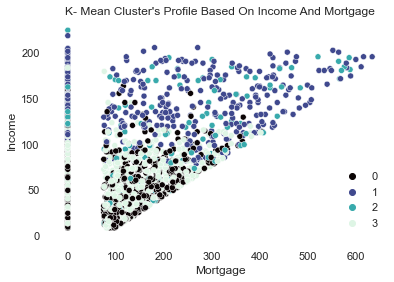

In [269]:
# Cluster Profile based on Income and Mortgage:
plt_income_spend = sns.scatterplot(data = data_cluster, x = data_cluster['Mortgage'], y = data_cluster['Income'], hue = data_cluster['KmeanCluster'], palette = "mako")
plt_income_spend.set_title("K- Mean Cluster's Profile Based On Income And Mortgage")
plt.legend()
plt.show()

<font color='red'>**Define Cluster**</font><br>
**Group 0**: average and low Spending and Income, their experience and age is senior (more than 48 years old), lower chance of loan offer.<br>
**Group 1**: high Spending and Income, this group does not have certificate of deposit and high chance of loan offer <br>
**Group 2**: high Spending and Income, have certificate of deposit and high chance of loan offer. <br>
**Group 3**: average and low Spending and Income, their experience and age is young and middle age (less than 48 years old, low chance of loan offer. <br>

## 2. Supervised learning - Classification

For this classification model, I will use:
 - Decision Tree
 - K-Nearest Neighboor
 - Naive Bayes

The workflow would be:
 1. Train, split the data
 2. Evaluation with Data that have been pre-processing
 3. Evaluation with Data that have been using SMOTE to balance dataset.

In [270]:
# Copy data set:
data_class = data.copy()

### One-hot encode

Since there is no categorial variable => skip this part.

### 1. Train/Test Split:

In [271]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, roc_auc_score, precision_score
from sklearn.metrics import plot_confusion_matrix

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import f_classif
from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

In [272]:
X = data_class.drop(columns = ['PersonalLoan','ZIPCode', 'Family'])
y = data_class['PersonalLoan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle = True, stratify = y)

In [273]:
X_train.dtypes

Age                    int64
Experience             int64
Income                 int64
CCAvg                float64
Education              int64
Mortgage               int64
SecuritiesAccount      int64
CDAccount              int64
Online                 int64
CreditCard             int64
dtype: object

### 2. Evaluation with Raw Data

### 2.1 Decision Tree:

In [274]:
DTC=DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
DTC.fit(X_train, y_train)
print("Accuracy: %.2f%%" % ((DTC.score(X_test,y_test))*100.0))

Accuracy: 96.42%


In [275]:
y_pred_DTC = DTC.predict(X_test)
precision_recall_fscore_support(y_test, y_pred_DTC, average='binary',pos_label=1,beta = 1)
print(classification_report(y_test,y_pred_DTC))
print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred_DTC)*100.0))
print("Recall: %.2f%%" % ((recall_score(y_test,y_pred_DTC))*100.0))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       882
           1       0.88      0.73      0.80        95

    accuracy                           0.96       977
   macro avg       0.93      0.86      0.89       977
weighted avg       0.96      0.96      0.96       977

Accuracy: 96.42%
Recall: 72.63%


### 2.2 Naiye Bayes:

In [276]:
naive_model = GaussianNB()
naive_model.fit(X_train, y_train)
print("Accuracy: %.2f%%" % ((naive_model.score(X_test,y_test))*100.0))

Accuracy: 87.82%


In [278]:
y_pred_N = naive_model.predict(X_test)
precision_recall_fscore_support(y_test, y_pred_N, average='binary',pos_label=1,beta = 1)
print(classification_report(y_test,y_pred_N))
print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred_N)*100.0))
print("Recall: %.2f%%" % ((recall_score(y_test,y_pred_N))*100.0))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       882
           1       0.41      0.61      0.49        95

    accuracy                           0.88       977
   macro avg       0.69      0.76      0.71       977
weighted avg       0.90      0.88      0.89       977

Accuracy: 87.82%
Recall: 61.05%


### 2.3 KNN:

Minimum error:- 0.08802456499488229 at K = 29


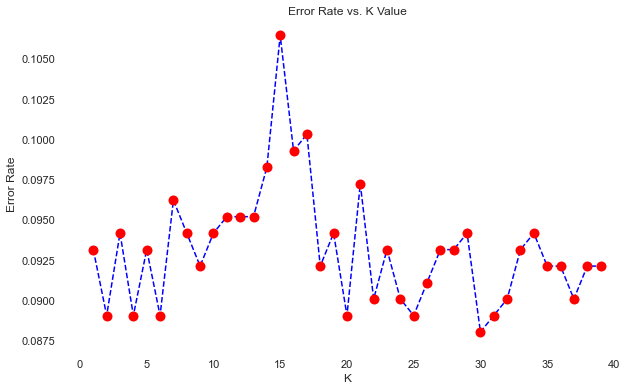

In [279]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))


In [280]:
KNN = KNeighborsClassifier(n_neighbors= 29 , weights = 'uniform', metric='euclidean')
KNN.fit(X_train,y_train)    
print("Accuracy: %.2f%%" % ((KNN.score(X_test,y_test))*100.0))

Accuracy: 90.58%


In [281]:
y_pred_KNN = KNN.predict(X_test)
precision_recall_fscore_support(y_test, y_pred_KNN, average='binary',pos_label=1,beta = 1)
print(classification_report(y_test,y_pred_KNN))
print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred_KNN)*100.0))
print("Recall: %.2f%%" % ((recall_score(y_test,y_pred_KNN))*100.0))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       882
           1       0.54      0.22      0.31        95

    accuracy                           0.91       977
   macro avg       0.73      0.60      0.63       977
weighted avg       0.88      0.91      0.89       977

Accuracy: 90.58%
Recall: 22.11%


### Model Comparison:

Decision Tree model has highest Precision and recall. We would choose Decision Tree for evaluation. The recall of this model is 73%, which is in average. We would use SMOTE to see how model improve recall ratio.

### 3. Using SMOTE to upscale training set

**Why using SMOTE?**:<br>
Due to imbalance dataset (only 10%  customers who accepted loan offer), one approach to solve this problems is duplicating examples in the minority class, and then synthesized from the existing examples. Therefore, Synthetic Minority Oversampling Technique or SMOTE is suitable.

"SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b." <br>
*Page 47, Imbalanced Learning: Foundations, Algorithms, and Applications, 2013*

In [282]:
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler

from imblearn.pipeline import Pipeline
from collections import Counter

In [283]:
sm = SMOTE(sampling_strategy='auto', random_state=1234)
x_sm, y_sm = sm.fit_resample(X_train, y_train)

print(Counter(y_train))
print(Counter(y_sm))

Counter({0: 3527, 1: 378})
Counter({0: 3527, 1: 3527})


In [284]:
over = BorderlineSMOTE(sampling_strategy=0.3)
under = RandomUnderSampler(sampling_strategy=0.6)

steps = [('o', over), ('u', under)]

In [285]:
pipeline = Pipeline(steps=steps)

# transform the dataset
x_sm_us, y_sm_us = pipeline.fit_resample(X_train, y_train)

print(Counter(y_train))
print(Counter(y_sm_us))

Counter({0: 3527, 1: 378})
Counter({0: 1763, 1: 1058})


In [286]:
DTC=DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
DTC.fit(x_sm_us, y_sm_us)
print("Accuracy: %.2f%%" % ((DTC.score(x_sm_us,y_sm_us))*100.0))

Accuracy: 88.37%


In [287]:
y_pred = DTC.predict(X_test)
precision_recall_fscore_support(y_test, y_pred, average='binary',pos_label=1,beta = 1)
print(classification_report(y_test,y_pred))
print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred)*100.0))
print("Recall: %.2f%%" % ((recall_score(y_test,y_pred))*100.0))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91       882
           1       0.40      0.97      0.56        95

    accuracy                           0.85       977
   macro avg       0.70      0.90      0.74       977
weighted avg       0.94      0.85      0.88       977

Accuracy: 85.36%
Recall: 96.84%


Confusion matrix, without normalization
[[742 140]
 [  3  92]]
Normalized confusion matrix
[[0.84126984 0.15873016]
 [0.03157895 0.96842105]]


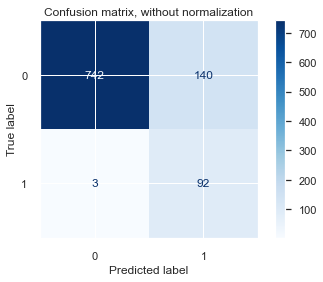

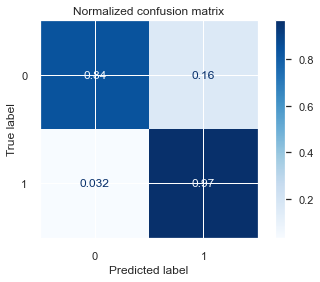

In [288]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(
        DTC, X_test, y_test, display_labels=DTC.classes_,
        cmap=plt.cm.Blues, normalize=normalize
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

With SMOTE the **precision** has decrease to **85%** but increase **recall** to **96%**

In [289]:
features_to_plot = 10
feature_name = list((X).columns)
importances = DTC.feature_importances_
indices = np.argsort(importances)

best_vars = np.array(feature_name)[indices][-features_to_plot:]
values = importances[indices][-features_to_plot:]
best_vars

array(['Age', 'Experience', 'Mortgage', 'SecuritiesAccount', 'CDAccount',
       'Online', 'CreditCard', 'CCAvg', 'Education', 'Income'],
      dtype='<U17')

In [290]:
values

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.08476665, 0.12917734, 0.78605601])

<AxesSubplot:>

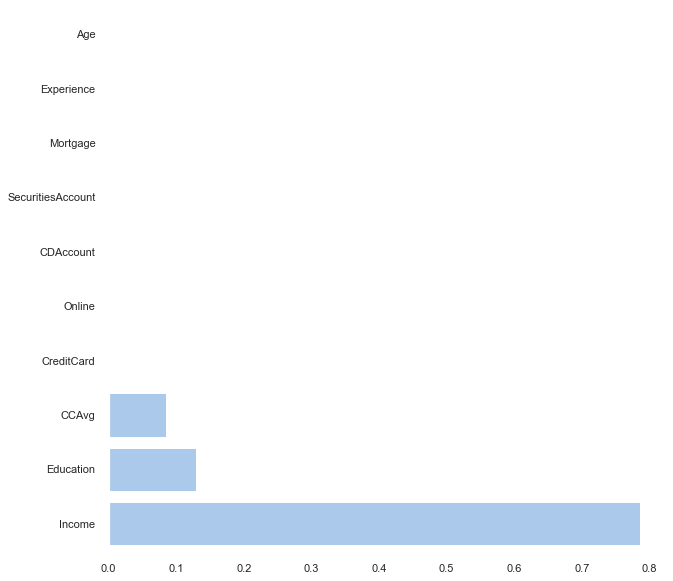

In [291]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
sns.set_color_codes("pastel")
sns.barplot(x=values, y=best_vars, label="Important feature", color="b")

<font color='red'>**Conclusion**:</font><br>
The purpose of this analysis is to increase personal loans through a marketing campaign. Hence, the marketing department needs information about customers to focus on target one.<br>
**Based on 5,000 customers who join the campaigns, we see that:**<br>
Income is the most impactable variable for classifying customers who join and do not join the loan campaign to predict the next customers.
We see that with high income, customers are likely to accept loan offers since they have enough mortgage to cover the loan, and enough income to maintain bank loan interest. Average Spending and Education are also important features but seem not impactful.